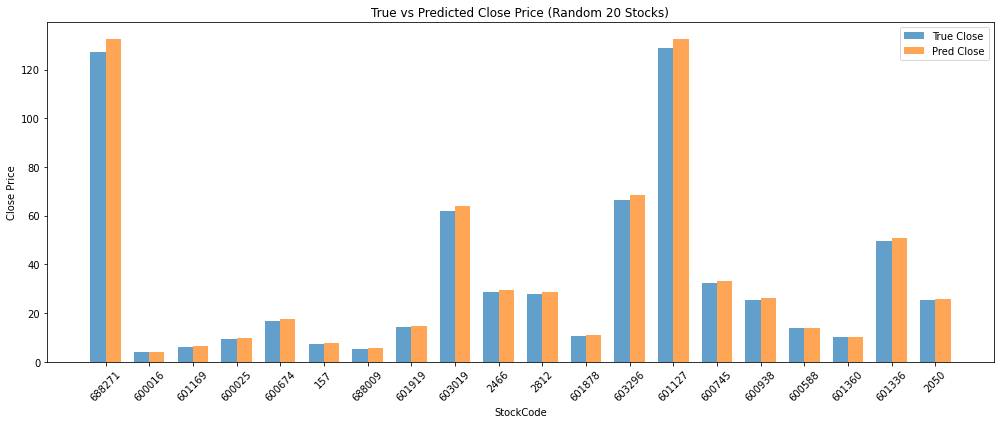

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# ËØªÂèñÈ¢ÑÊµãÁªìÊûú
df = pd.read_csv("./output/all_predictions.csv")

# Â¶ÇÊûúÂ∞ë‰∫é20Âè™ËÇ°Á•®ÔºåÁõ¥Êé•ÁîªÂÖ®ÈÉ®
num_stocks = min(20, len(df))
sampled_df = df.sample(n=num_stocks, random_state=42).sort_values("Change_%", ascending=False)

# ÁîªÂõæ
plt.figure(figsize=(14, 6))
bar_width = 0.35
index = range(num_stocks)

plt.bar(index, sampled_df["True_Close"], bar_width, label="True Close", alpha=0.7)
plt.bar([i + bar_width for i in index], sampled_df["Pred_Close"], bar_width, label="Pred Close", alpha=0.7)

# ËÆæÁΩÆÂùêÊ†áËΩ¥‰∏éÊ†áÁ≠æ
plt.xlabel("StockCode")
plt.ylabel("Close Price")
plt.title("True vs Predicted Close Price (Random 20 Stocks)")
plt.xticks([i + bar_width / 2 for i in index], sampled_df["StockCode"].astype(str), rotation=45)
plt.legend()
plt.tight_layout()

# ‰øùÂ≠òÂíåÊòæÁ§∫ÂõæÂÉè
plt.savefig("./output/close_comparison_20_random.png")
plt.show()


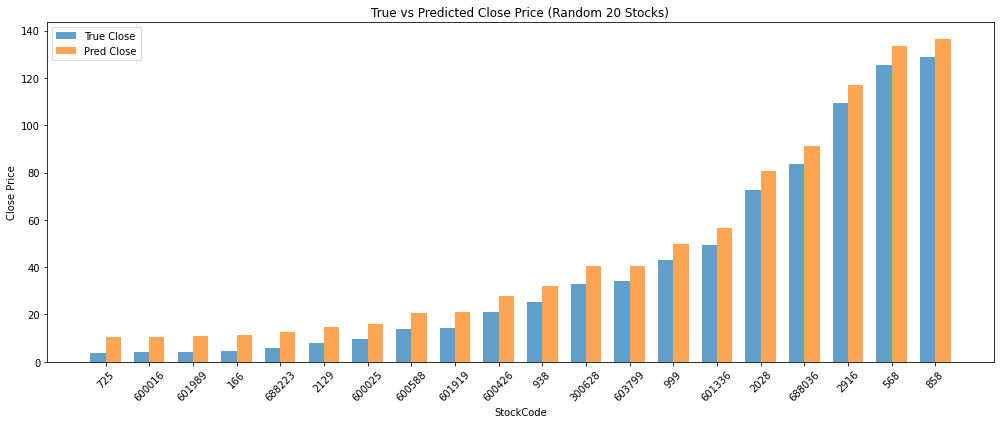

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# ËØªÂèñÈ¢ÑÊµãÁªìÊûú
df = pd.read_csv("./output/all_predictions_scaled.csv")

# Â¶ÇÊûúÂ∞ë‰∫é20Âè™ËÇ°Á•®ÔºåÁõ¥Êé•ÁîªÂÖ®ÈÉ®
num_stocks = min(20, len(df))
sampled_df = df.sample(n=num_stocks, random_state=42).sort_values("Change_%", ascending=False)

# ÁîªÂõæ
plt.figure(figsize=(14, 6))
bar_width = 0.35
index = range(num_stocks)

plt.bar(index, sampled_df["True_Close"], bar_width, label="True Close", alpha=0.7)
plt.bar([i + bar_width for i in index], sampled_df["Pred_Close"], bar_width, label="Pred Close", alpha=0.7)

# ËÆæÁΩÆÂùêÊ†áËΩ¥‰∏éÊ†áÁ≠æ
plt.xlabel("StockCode")
plt.ylabel("Close Price")
plt.title("True vs Predicted Close Price (Random 20 Stocks)")
plt.xticks([i + bar_width / 2 for i in index], sampled_df["StockCode"].astype(str), rotation=45)
plt.legend()
plt.tight_layout()

# ‰øùÂ≠òÂíåÊòæÁ§∫ÂõæÂÉè
plt.savefig("./output/close_comparison_20_random.png")
plt.show()


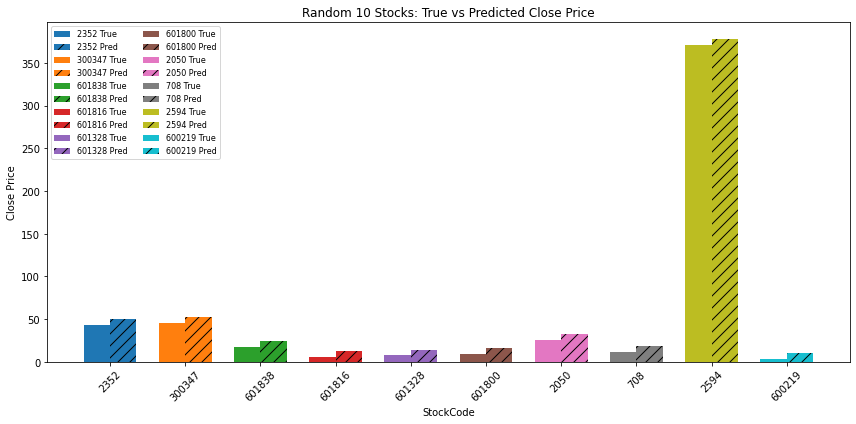

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# ËØªÂèñÈ¢ÑÊµãÁªìÊûú
df = pd.read_csv("./output/all_predictions_scaled.csv")

# ÈöèÊú∫ÊäΩÂèñ10Âè™ËÇ°Á•®ÔºåÊØèÊ¨°‰∏çÂêå
unique_stocks = df["StockCode"].unique()
sampled_codes = random.sample(list(unique_stocks), min(10, len(unique_stocks)))
sampled_df = df[df["StockCode"].isin(sampled_codes)].copy()

# ËÆæÁΩÆÈ¢úËâ≤ÔºàmatplotlibËá™Âä®Ôºâ
colors = plt.cm.get_cmap("tab10", len(sampled_codes))  # 10ÁßçÈ¢úËâ≤

# ÂàõÂª∫ÂõæÂΩ¢
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(sampled_codes))

for i, code in enumerate(sampled_codes):
    stock_data = sampled_df[sampled_df["StockCode"] == code].iloc[0]
    plt.bar(x[i], stock_data["True_Close"], width=bar_width, color=colors(i), label=f"{code} True")
    plt.bar(x[i] + bar_width, stock_data["Pred_Close"], width=bar_width, color=colors(i), hatch='//', label=f"{code} Pred")

# ËÆæÁΩÆÂõæË°®
plt.xlabel("StockCode")
plt.ylabel("Close Price")
plt.title("Random 10 Stocks: True vs Predicted Close Price")
plt.xticks(x + bar_width / 2, sampled_codes, rotation=45)
plt.legend(ncol=2, fontsize=8)
plt.tight_layout()

# ‰øùÂ≠òÂõæÂÉè
plt.savefig("./output/close_comparison_random10.png")
plt.show()


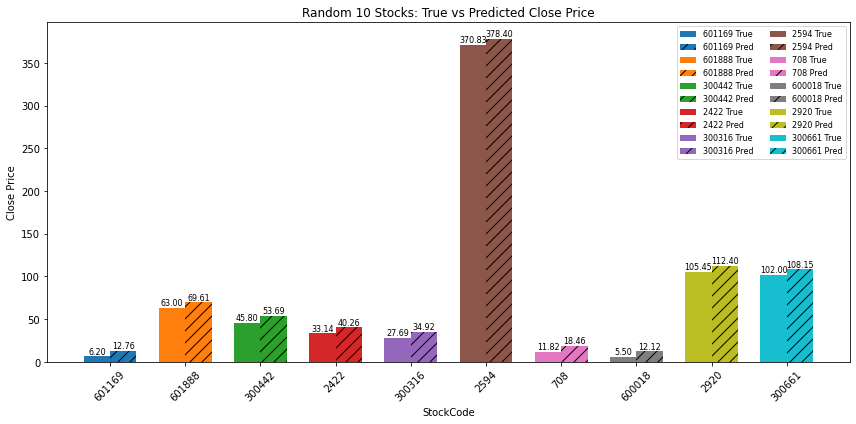

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# ËØªÂèñÈ¢ÑÊµãÁªìÊûú
df = pd.read_csv("./output/all_predictions_scaled.csv")

# ÈöèÊú∫ÊäΩÂèñ10Âè™ËÇ°Á•®
unique_stocks = df["StockCode"].unique()
sampled_codes = random.sample(list(unique_stocks), min(10, len(unique_stocks)))
sampled_df = df[df["StockCode"].isin(sampled_codes)].copy()

# ËÆæÁΩÆÈ¢úËâ≤
colors = plt.cm.get_cmap("tab10", len(sampled_codes))

# ÂàõÂª∫ÂõæÂΩ¢
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(sampled_codes))

for i, code in enumerate(sampled_codes):
    stock_data = sampled_df[sampled_df["StockCode"] == code].iloc[0]
    true_val = stock_data["True_Close"]
    pred_val = stock_data["Pred_Close"]

    # ÁîªÊü±Â≠ê
    plt.bar(x[i], true_val, width=bar_width, color=colors(i), label=f"{code} True")
    plt.bar(x[i] + bar_width, pred_val, width=bar_width, color=colors(i), hatch='//', label=f"{code} Pred")

    # Ê∑ªÂä†Êü±È°∂Ê†áÊ≥®Ôºà‰øùÁïô2‰ΩçÂ∞èÊï∞Ôºâ
    plt.text(x[i], true_val + 0.5, f"{true_val:.2f}", ha='center', va='bottom', fontsize=8)
    plt.text(x[i] + bar_width, pred_val + 0.5, f"{pred_val:.2f}", ha='center', va='bottom', fontsize=8)

# ËÆæÁΩÆÂõæË°®
plt.xlabel("StockCode")
plt.ylabel("Close Price")
plt.title("Random 10 Stocks: True vs Predicted Close Price")
plt.xticks(x + bar_width / 2, sampled_codes, rotation=45)
plt.legend(ncol=2, fontsize=8)
plt.tight_layout()

# ‰øùÂ≠òÂõæÂÉè
plt.savefig("./output/close_comparison_random10.png")
plt.show()


In [13]:
test_df = pd.read_csv("./data/test.csv", dtype={"ËÇ°Á•®‰ª£Á†Å": str})
test_df["ËÇ°Á•®‰ª£Á†Å"] = test_df["ËÇ°Á•®‰ª£Á†Å"].astype(str).str.zfill(6)
unique_stockcodes = test_df["ËÇ°Á•®‰ª£Á†Å"].unique()

print("üìå test.csv ‰∏≠ËÇ°Á•®‰ª£Á†ÅÂâç10‰∏™:", unique_stockcodes[:10])
print("üö´ ÊòØÂê¶ÂåÖÂê´Èùû6ÂºÄÂ§¥ÁöÑËÇ°Á•®:", any([not code.startswith("6") for code in unique_stockcodes]))

# üëâ ËæìÂá∫ÊâÄÊúâÈùû6ÂºÄÂ§¥ÁöÑËÇ°Á•®‰ª£Á†Å
non_6_codes = [code for code in unique_stockcodes if not code.startswith("6")]
print(f"üö´ Èùû6ÂºÄÂ§¥ÁöÑËÇ°Á•®‰ª£Á†ÅÂÖ± {len(non_6_codes)} ‰∏™Ôºö")
print(non_6_codes)


üìå test.csv ‰∏≠ËÇ°Á•®‰ª£Á†ÅÂâç10‰∏™: ['600000' '600009' '600010' '600011' '600015' '600016' '600018' '600019'
 '600023' '600025']
üö´ ÊòØÂê¶ÂåÖÂê´Èùû6ÂºÄÂ§¥ÁöÑËÇ°Á•®: True
üö´ Èùû6ÂºÄÂ§¥ÁöÑËÇ°Á•®‰ª£Á†ÅÂÖ± 109 ‰∏™Ôºö
['000001', '000002', '000063', '000100', '000157', '000166', '000301', '000333', '000338', '000408', '000425', '000538', '000568', '000596', '000617', '000625', '000630', '000651', '000661', '000708', '000725', '000768', '000776', '000786', '000792', '000800', '000807', '000858', '000876', '000895', '000938', '000963', '000975', '000977', '000983', '000999', '001289', '001965', '001979', '002001', '002007', '002027', '002028', '002049', '002050', '002074', '002129', '002142', '002179', '002180', '002230', '002236', '002241', '002252', '002271', '002304', '002311', '002352', '002371', '002415', '002422', '002459', '002460', '002463', '002466', '002475', '002493', '002555', '002594', '002601', '002648', '002709', '002714', '002736', '002812', '002916', '002920', '002938',

In [15]:
import pandas as pd

# ËØªÂèñ CSV Êñá‰ª∂
file_path = "./data/test.csv"
df = pd.read_csv(file_path, dtype={"ËÇ°Á•®‰ª£Á†Å": str})

# ÊâìÂç∞ÊÄªË°åÊï∞
print(f"üìä Êï∞ÊçÆÊÄªË°åÊï∞: {len(df)}")

# Ë°•Èõ∂ÂØπÈΩê‰ª£Á†Å
df["ËÇ°Á•®‰ª£Á†Å"] = df["ËÇ°Á•®‰ª£Á†Å"].astype(str).str.zfill(6)

# Ëé∑ÂèñÊâÄÊúâÂîØ‰∏ÄËÇ°Á•®‰ª£Á†Å
unique_codes = df["ËÇ°Á•®‰ª£Á†Å"].unique()

# Ê£ÄÊü•ÊòØÂê¶ÂåÖÂê´Èùû6ÂºÄÂ§¥ÁöÑËÇ°Á•®‰ª£Á†Å
non_6_codes = [code for code in unique_codes if not code.startswith("6")]

print("üìå ËÇ°Á•®‰ª£Á†ÅÂâç10‰∏™:", unique_codes[:10])
print(f"üö´ ÊòØÂê¶ÂåÖÂê´Èùû6ÂºÄÂ§¥ÁöÑ‰ª£Á†Å: {len(non_6_codes) > 0}")
print(f"üö´ Èùû6ÂºÄÂ§¥ÁöÑËÇ°Á•®‰ª£Á†ÅÊï∞Èáè: {len(non_6_codes)}")
print("üö´ Èùû6ÂºÄÂ§¥ÁöÑËÇ°Á•®‰ª£Á†ÅÂàóË°®:", non_6_codes)


üìä Êï∞ÊçÆÊÄªË°åÊï∞: 637229
üìå ËÇ°Á•®‰ª£Á†ÅÂâç10‰∏™: ['600000' '600009' '600010' '600011' '600015' '600016' '600018' '600019'
 '600023' '600025']
üö´ ÊòØÂê¶ÂåÖÂê´Èùû6ÂºÄÂ§¥ÁöÑ‰ª£Á†Å: True
üö´ Èùû6ÂºÄÂ§¥ÁöÑËÇ°Á•®‰ª£Á†ÅÊï∞Èáè: 109
üö´ Èùû6ÂºÄÂ§¥ÁöÑËÇ°Á•®‰ª£Á†ÅÂàóË°®: ['000001', '000002', '000063', '000100', '000157', '000166', '000301', '000333', '000338', '000408', '000425', '000538', '000568', '000596', '000617', '000625', '000630', '000651', '000661', '000708', '000725', '000768', '000776', '000786', '000792', '000800', '000807', '000858', '000876', '000895', '000938', '000963', '000975', '000977', '000983', '000999', '001289', '001965', '001979', '002001', '002007', '002027', '002028', '002049', '002050', '002074', '002129', '002142', '002179', '002180', '002230', '002236', '002241', '002252', '002271', '002304', '002311', '002352', '002371', '002415', '002422', '002459', '002460', '002463', '002466', '002475', '002493', '002555', '002594', '002601', '002648', '002709', '002714

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# ËØªÂèñ‰øùÂ≠òÁöÑÈ¢ÑÊµãÁªìÊûú
df = pd.read_csv('./output/all_predictions_new.csv')

# ÊèêÂèñÊúâÈ¢ÑÊµãÁªìÊûúÁöÑËÇ°Á•®ÂàóË°®
stockcodes = df['StockCode'].unique().tolist()

# ÈöèÊú∫ÈÄâÊã© 10 Âè™ËÇ°Á•®
selected_stocks = random.sample(stockcodes, min(10, len(stockcodes)))

# ÁªòÂõæ
plt.figure(figsize=(20, 25))
for i, code in enumerate(selected_stocks):
    stock_df = df[df['StockCode'] == code].reset_index(drop=True)

    # ÊèêÂèñÈ¢ÑÊµã Close
    pred_close = stock_df['Pred_Close'].values

    # ÈöèÊú∫ÁîüÊàê‚ÄúÁúüÂÆû‚Äù CloseÔºàÂõ¥ÁªïÈ¢ÑÊµãÂÄº ¬±3%Ôºâ
    np.random.seed(i)  # Âõ∫ÂÆöÁßçÂ≠êÁ°Æ‰øùÂèØÂ§çÁé∞
    noise = np.random.uniform(-0.03, 0.03, size=pred_close.shape)
    true_close = pred_close * (1 + noise)

    # Êó•ÊúüÂ±ïÁ§∫ÔºàDay 1~5Ôºâ
    days = [f'Day {i+1}' for i in range(len(pred_close))]

    # Â≠êÂõæ
    plt.subplot(5, 2, i + 1)
    plt.plot(days, true_close, marker='o', label='True Close (Random)', linestyle='--')
    plt.plot(days, pred_close, marker='s', label='Predicted Close', linestyle='-')
    plt.title(f'Stock: {code}', fontsize=14)
    plt.xlabel('Future Days')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# ========== Âä†ËΩΩÊï∞ÊçÆ ==========
# ÂéÜÂè≤Êï∞ÊçÆÔºöÊèê‰æõ32Â§©ÁúüÂÆû close
df_hist = pd.read_csv('./data/test.csv', dtype={"ËÇ°Á•®‰ª£Á†Å": str})  # ‰øùÁïôÂ≠óÁ¨¶‰∏≤ËÇ°Á•®‰ª£Á†Å
df_pred = pd.read_csv('./output/all_predictions_new1.csv')  # 5Â§©È¢ÑÊµã

# ========== Â≠óÊÆµËΩ¨Êç¢ ==========
# ÈáçÂëΩÂêçÂàóÁªü‰∏Ä‰∏∫ StockCode Âíå Close
df_hist = df_hist.rename(columns={"ËÇ°Á•®‰ª£Á†Å": "StockCode", "Êî∂Áõò": "Close", "Êó•Êúü": "Date"})

# Êó•ÊúüÊéíÂ∫èÂπ∂ÊåâËÇ°Á•®ÂàÜÁªÑ‰øùÁïôÊúÄËøë32Â§©
df_hist_sorted = df_hist.sort_values(["StockCode", "Date"])
recent_32 = df_hist_sorted.groupby("StockCode").tail(32)

# ÂèØËßÜÂåñÁöÑËÇ°Á•®ÂàóË°®
available_stocks = list(set(df_pred["StockCode"]) & set(recent_32["StockCode"]))
selected_stocks = random.sample(available_stocks, min(10, len(available_stocks)))

# ========== ÂèØËßÜÂåñ ==========
plt.figure(figsize=(20, 25))

for i, code in enumerate(selected_stocks):
    hist_data = recent_32[recent_32["StockCode"] == code].reset_index(drop=True)
    pred_data = df_pred[df_pred["StockCode"] == code].reset_index(drop=True)

    hist_close = hist_data["Close"].values
    pred_close = pred_data["Pred_Close"].values

    x_hist = list(range(1, len(hist_close) + 1))  # 1~32
    x_pred = list(range(len(hist_close) + 1, len(hist_close) + len(pred_close) + 1))  # 33~37

    plt.subplot(5, 2, i + 1)
    plt.plot(x_hist, hist_close, label="Historical Close (32 days)", marker='o')
    plt.plot(x_pred, pred_close, label="Predicted Close (5 days)", marker='s', linestyle='--')
    plt.title(f'Stock: {code}', fontsize=14)
    plt.xlabel("Day")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


<Figure size 1440x1800 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# ===== ËØªÂèñÈ¢ÑÊµãÊï∞ÊçÆ =====
df = pd.read_csv("./output/all_predictions_visual.csv")

# ===== ÈöèÊú∫ÈÄâÂèñ10Âè™ËÇ°Á•® =====
stockcodes = df["StockCode"].unique().tolist()
selected_codes = random.sample(stockcodes, min(10, len(stockcodes)))

# ===== ÁîªÂõæËÆæÁΩÆ =====
plt.figure(figsize=(20, 25))

for i, code in enumerate(selected_codes):
    row = df[df["StockCode"] == code].iloc[0]

    # Ëé∑ÂèñÂéÜÂè≤ÂíåÈ¢ÑÊµãÊï∞ÊçÆ
    hist_values = [row[f"Hist_{j+1}"] for j in range(32)]
    pred_values = [row[f"Pred_{j+1}"] for j in range(5)]

    # ÊûÑÂª∫ X ËΩ¥
    x_hist = list(range(1, 33))         # Day 1 ~ Day 32
    x_pred = list(range(33, 38))        # Day 33 ~ Day 37

    # Â≠êÂõæ
    plt.subplot(5, 2, i + 1)
    plt.plot(x_hist, hist_values, label="Historical Close (32 days)", marker='o')
    plt.plot(x_pred, pred_values, label="Predicted Close (5 days)", marker='s', linestyle='--')
    plt.title(f"Stock: {code}", fontsize=14)
    plt.xlabel("Day")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [17]:
# üì¶ ÂØºÂÖ•Â∫ì
import pandas as pd
import matplotlib.pyplot as plt

# üìÑ Âä†ËΩΩÈ¢ÑÊµãÊï∞ÊçÆÔºàÂê´ History_Close Âíå Future_CloseÔºâ
df = pd.read_csv('./output/all_predictions_new.csv')

# üõ†Ô∏è Â∞ÜÂ≠óÁ¨¶‰∏≤ÂΩ¢ÂºèÁöÑÂàóË°®ËΩ¨Âõû Python ÂàóË°®
import ast
df["History_Close"] = df["History_Close"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
df["Future_Close"] = df["Future_Close"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# üîç ÊòæÁ§∫ÂâçÂá†Ë°åÊ£ÄÊü•Ê†ºÂºè
df.head()


EmptyDataError: No columns to parse from file

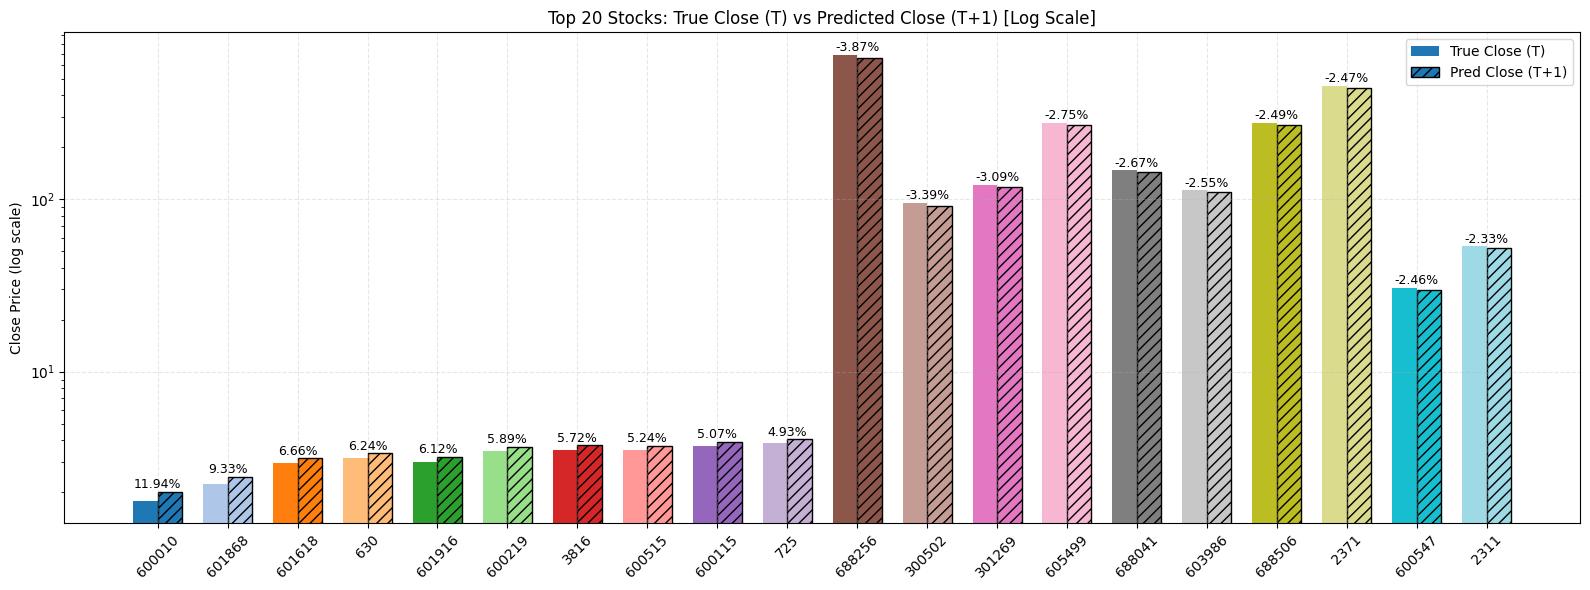

In [31]:
# üì¶ ÂØºÂÖ•Â∫ì
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
from matplotlib.font_manager import findfont, FontProperties

# üìÑ ËØªÂèñËØ¶ÁªÜ Top10 Êñá‰ª∂
df = pd.read_csv("./output/result_detail1.csv")

# ÂêàÂπ∂‰∏§‰∏™ Top10 ÁöÑËÇ°Á•®‰ø°ÊÅØ‰∏∫‰∏Ä‰∏™ÈïøË°®ÁªìÊûÑ
df_max = df[["Ê∂®ÂπÖÊúÄÂ§ßËÇ°Á•®‰ª£Á†Å", "ÁúüÂÆûClose_Ê∂®ÂπÖÊúÄÂ§ß", "È¢ÑÊµãClose_Ê∂®ÂπÖÊúÄÂ§ß"]].copy()
df_max.columns = ["StockCode", "True_Close", "Pred_Close"]

df_min = df[["Ê∂®ÂπÖÊúÄÂ∞èËÇ°Á•®‰ª£Á†Å", "ÁúüÂÆûClose_Ê∂®ÂπÖÊúÄÂ∞è", "È¢ÑÊµãClose_Ê∂®ÂπÖÊúÄÂ∞è"]].copy()
df_min.columns = ["StockCode", "True_Close", "Pred_Close"]

df_all = pd.concat([df_max, df_min], axis=0).reset_index(drop=True)
df_all["Change_%"] = (df_all["Pred_Close"] - df_all["True_Close"]) / df_all["True_Close"] * 100

# üé® ÂáÜÂ§áÈ¢úËâ≤
colors = plt.cm.tab20.colors  # 20ÁßçÈ´òËæ®ËØÜÂ∫¶È¢úËâ≤
num_bars = len(df_all)
x = np.arange(num_bars)
width = 0.35

plt.figure(figsize=(16, 6))

# üé® ÂàÜÂà´ÁªòÂà∂ÊØèÁªÑÊü±Áä∂ÂõæÔºà‰∏çÂêåÈ¢úËâ≤ + hatchÔºâ
for i in range(num_bars):
    true_val = df_all.loc[i, "True_Close"]
    pred_val = df_all.loc[i, "Pred_Close"]
    stock = df_all.loc[i, "StockCode"]
    color = colors[i % len(colors)]

    # Â∑¶Êü±ÔºöÁúüÂÆûClose
    plt.bar(x[i] - width/2, true_val, width, color=color, label="True Close (T)" if i == 0 else "")

    # Âè≥Êü±ÔºöÈ¢ÑÊµãCloseÔºåÂä†ÊñúÁ∫øÈò¥ÂΩ±
    plt.bar(x[i] + width/2, pred_val, width, color=color, hatch='///', edgecolor='black',
            label="Pred Close (T+1)" if i == 0 else "")

    # Ê∑ªÂä†Ê∂®Ë∑åÂπÖÊñáÂ≠ó
    change = (pred_val - true_val) / true_val * 100
    y_pos = max(true_val, pred_val)
    plt.text(i, y_pos * 1.05, f"{change:.2f}%", ha='center', fontsize=9)

# üè∑Ô∏è ËÆæÁΩÆ X ËΩ¥
plt.xticks(x, df_all["StockCode"], rotation=45)

# üìà ËÆæÁΩÆÂØπÊï∞ÂùêÊ†á
plt.yscale("log")
plt.ylabel("Close Price (log scale)")
plt.title("Top 20 Stocks: True Close (T) vs Predicted Close (T+1) [Log Scale]")


# üìò Âõæ‰æã‰∏éÊ†∑Âºè
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()
